## **Probabilidades** de estado estable de las cadenas de Markov

Recordemos la siguiente notación:

$$p_{ij} = \mathbb{P} \left[ X_{t+1}=j \ | \ X_t = i \right]$$

Si tenemos los estados $0,\,1,\,2,\ldots, M$, entonces podemos construir la matriz de transición $\mathbf{P}$, dada por:
$$
\mathbf{P}=
\begin{pmatrix}
p_{00} & p_{01} & \cdots & p_{0M}\\
p_{10} & p_{11} & \cdots & p_{1M}\\
\vdots & \vdots & \ddots & \vdots\\
p_{M0} & p_{M1} & \cdots & p_{MM}
\end{pmatrix}
$$

no olvidar que esta es la matriz de transición a un paso (el súper-índice (1)) no se escribe.

Usando esta misma notación y usando el resultado dado por las ecuaciones de Chapman-Kolmogorov, podemos escribir la matriz de transición $\mathbf{P}^{(n)}$ a $n$ pasos de la siguiente forma:

$$\mathbf{P}^{(n)} = \underbrace{\mathbf{P} \cdot \mathbf{P} \cdots \mathbf{P}}_{\text{n veces}} = \mathbf{P}^n$$

donde $\mathbf{P}^n$ en la última ecuación es la potencia n-ésima de la matriz de transición a un paso $\mathbf{P}$.

Si estamos interesados en encontrar las probabilidades de estado estable, es decir a qué probabilidades convergen nuestros $M$ estados en el largo plazo, debemos encontrar:

$$\lim_{n\rightarrow\infty}p^{(n)}_{ij} = \pi_j > 0$$

donde las $\pi_j$ satisfacen de manera única las siguientes **ecuaciones de estado estable**
$$\pi_j = \sum^M_{i=0}\pi_i\cdot p_{ij},   \text{para}\,j=0,1,\ldots,M,$$
junto con la siguiente ecuación
$$\pi_0 + \pi_1 + \cdots + \pi_M = 1.$$
De forma conveniente vamos a escribir las ecuaciones de estado estable de la siguiente forma
$$\boldsymbol{\pi} = \boldsymbol{\pi} \cdot \mathbf{P}$$
donde $\boldsymbol{\pi} = (\pi_0,\pi_1,\ldots,\pi_M)$. Ahora, re-escribimos la ecuación anterior
$$\boldsymbol{\pi} = \boldsymbol{\pi} \cdot \mathbf{P} \,\leftrightarrow\,\boldsymbol{\pi}(\mathbf{P}-I)=0$$
donde $I$ es la matriz identidad de orden $M$. Como la ecuación
$$\pi_0 + \pi_1 + \cdots + \pi_M = 1.$$
no estaba en el sistema anterior, la podemos agregar a la matriz $\mathbf{P}-I$ como un vector columna de unos (un vector cuyo largo es M y tiene en cada entrada números 1). Esta nueva matriz tiene $M$ filas y $M+1$ columnas. Llamemos a esta nueva matriz $\mathbf{Q}$ y ahora podemos escribir en el lado derecho un vector $\mathbf{b}=(0,0,\ldots,1)$ (repites los ceros M veces y el término M+1 es un 1). Con lo cual tenemos:
$$\boldsymbol{\pi}\mathbf{Q} = \mathbf{b}$$
multiplicamos ambos lados de esta ecuación por $\mathbf{Q}^T$
$$\boldsymbol{\pi}\mathbf{Q}\mathbf{Q}^T = \mathbf{b}\mathbf{Q}^T$$
donde ahora podemos resolver:
$$\boldsymbol{\pi} = \mathbf{b}\mathbf{Q}^T (\mathbf{Q}\mathbf{Q}^T)^{-1}$$
Para que esta ecuación resulte en el formato usual de álgebra lineal tomamos la transpuesta de esta ecuación y en la práctica (en el computador), resolvemos:
$$\boldsymbol{\pi}^T = (\mathbf{Q}^T\mathbf{Q})^{-1}(\mathbf{Q}\mathbf{b}^T)$$
Por otro lado, no es necesario calcular $\mathbf{Q}\mathbf{b}^T$ ya que es un vector solo de unos.

Finalmente, la función *estado_estacionario* a continuación estima las probabilidades de estado estacionario de una matriz de transición a un paso $\mathbf{P}$.

In [ ]:
import numpy as np

In [ ]:
def estado_estacionario(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    QbT = np.ones(dim)
    return np.linalg.solve(QTQ,QbT)

Supongamos que tenemos la siguiente matriz de transición:

In [ ]:
matriz_transicion1 = np.array([[0.1,0.3,0.2,0.2,0.2],
                             [0.3,0.2,0.3,0,0.2],
                             [0,0,1,0,0],
                              [0,0,0,1,0],
                               [0,0,0,0,1]])

In [ ]:
estado_estacionario1 = estado_estacionario(matriz_transicion1)
estado_estacionario1

LinAlgError: ignored

## ¿Y si queremos el grafo de nuestra matriz de transición?

En Python hay varias formas de hacer gráficos, en particular me gustaron los que diseñó  https://github.com/NaysanSaran
Solo debemos tener en nuestro directorio los archivos *node.py* y *markovchain.py* los cuales cargamos en las siguientes dos lineas de código

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]

Saving node.py to node.py
Saving markovchain.py to markovchain.py


In [ ]:
run node.py

In [ ]:
run markovchain.py

Luego, creamos nuestro objeto a dibujar, que llamaremos *mc*, esta función tiene como argumentos la matriz de transición y un vector con los nombres de nuestros estados. En el caso de nuestra matriz de ejemplo de tres estados ponemos 0,1 y 2 en formato string, ya que este nombre podría ser cualquier caracter.

In [ ]:
mc = MarkovChain(matriz_transicion1, ['1', '2', '3','4', '5'])
mc.draw()

Exception: ignored

### Otro Ejemplo:

In [ ]:
matriz_transicion = np.array([[0.5,0.5,0.0,0.0],
                              [0.4,0.6,0.0,0.0],
                              [round(1/7,2),round(2/7,2),round(3/7,2),round(1/7,2)],
                              [round(1/8,2),round(2/7,2),round(3/7,2),round(1/7,2)]])
matriz_transicion = np.array([[0.1,0.3,0.2,0.2,0.2],
                             [0.3,0.2,0.3,0,0.2],
                             [0.0,0.0,1.0,0.0,0.0],
                              [0.0,0.0,0.0,1.0,0.0],
                               [0.0,0.0,0.0,0.0,1.0]])

In [ ]:
mc = MarkovChain(matriz_transicion, ['0', '1', '2', '3', '4'])
mc.draw()

Exception: ignored

**Observación**: Esta librería solo permite hasta 4 estados para nuestra matriz de transición, de querer dibujar una matriz más grande hay otras formas, pero no son tan sencillas de utilizar como esta función.

## Grafos más grandes

para esto necesitamos utilizar la librería networkx

In [ ]:
import pandas as pd
import networkx as nx
from pprint import pprint

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

Nodes:
['C', 'G', 'DA', 'DB', 'DC']

Edges:
OutMultiEdgeDataView([('C', 'C', {'weight': 0.1, 'label': 0.1}), ('C', 'G', {'weight': 0.3, 'label': 0.3}), ('C', 'DA', {'weight': 0.2, 'label': 0.2}), ('C', 'DB', {'weight': 0.2, 'label': 0.2}), ('C', 'DC', {'weight': 0.2, 'label': 0.2}), ('G', 'C', {'weight': 0.3, 'label': 0.3}), ('G', 'G', {'weight': 0.2, 'label': 0.2}), ('G', 'DA', {'weight': 0.3, 'label': 0.3}), ('G', 'DB', {'weight': 0.0, 'label': 0.0}), ('G', 'DC', {'weight': 0.2, 'label': 0.2}), ('DA', 'C', {'weight': 0.0, 'label': 0.0}), ('DA', 'G', {'weight': 0.0, 'label': 0.0}), ('DA', 'DA', {'weight': 1.0, 'label': 1.0}), ('DA', 'DB', {'weight': 0.0, 'label': 0.0}), ('DA', 'DC', {'weight': 0.0, 'label': 0.0}), ('DB', 'C', {'weight': 0.0, 'label': 0.0}), ('DB', 'G', {'weight': 0.0, 'label': 0.0}), ('DB', 'DA', {'weight': 0.0, 'label': 0.0}), ('DB', 'DB', {'weight': 1.0, 'label': 1.0}), ('DB', 'DC', {'weight': 0.0, 'label': 0.0}), ('DC', 'C', {'weight': 0.0, 'label': 0.0}), ('DC', '

<ipython-input-47-a0619fcba202>:23: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


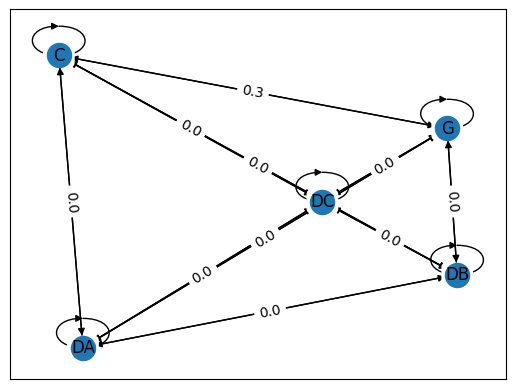

In [ ]:
estados = ['C', 'G', 'DA', 'DB', 'DC']
Pmat_df = pd.DataFrame(columns=estados,index=estados)
for indx, estado in enumerate(estados):
    Pmat_df.loc[estados[indx]] = list(matriz_transicion[indx,:])
#Pmat = Pmat_df.values

edges_wts = _get_markov_edges(Pmat_df)

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(estados)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

## create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'grafo_4estados.dot')

Como pueden ver el grafo no representa realmente lo que es nuestra matriz de transición, en resumen, hay que realizar este grafo de otra forma. Lo que hace networkx es útil ya que nos representa cada nodo del grafo junto con todos los posibles cambios de estado y sus respectivos pesos.

## Grafo de 6 estados:

In [ ]:
matriz_transicion_G02 = np.array([[0.0,0.0,round(1/3,2),round(2/3,2),0.0,0.0],
                                  [0.0,0.0,round(3/4,2),round(1/4,2),0.0,0.0],
                                  [0.0,0.0,0.0,0.0,round(4/7,2),round(3/7,2)],
                                  [0.0,0.0,0.0,0.0,round(2/3,2),round(1/3,2)],
                                  [round(2/5,2),round(3/5,2),0.0,0.0,0.0,0.0],
                                  [round(5/8,2),round(3/8,2),0.0,0.0,0.0,0.0]])
estados = ['A','B','C','D','E','F']

Nodes:
['C', 'G', 'A', 'B', 'z']

Edges:
OutMultiEdgeDataView([('C', 'C', {'weight': 0.1, 'label': 0.1}), ('C', 'G', {'weight': 0.3, 'label': 0.3}), ('C', 'A', {'weight': 0.2, 'label': 0.2}), ('C', 'B', {'weight': 0.2, 'label': 0.2}), ('C', 'z', {'weight': 0.2, 'label': 0.2}), ('G', 'C', {'weight': 0.3, 'label': 0.3}), ('G', 'G', {'weight': 0.2, 'label': 0.2}), ('G', 'A', {'weight': 0.3, 'label': 0.3}), ('G', 'B', {'weight': 0.0, 'label': 0.0}), ('G', 'z', {'weight': 0.2, 'label': 0.2}), ('A', 'C', {'weight': 0.0, 'label': 0.0}), ('A', 'G', {'weight': 0.0, 'label': 0.0}), ('A', 'A', {'weight': 1.0, 'label': 1.0}), ('A', 'B', {'weight': 0.0, 'label': 0.0}), ('A', 'z', {'weight': 0.0, 'label': 0.0}), ('B', 'C', {'weight': 0.0, 'label': 0.0}), ('B', 'G', {'weight': 0.0, 'label': 0.0}), ('B', 'A', {'weight': 0.0, 'label': 0.0}), ('B', 'B', {'weight': 1.0, 'label': 1.0}), ('B', 'z', {'weight': 0.0, 'label': 0.0}), ('z', 'C', {'weight': 0.0, 'label': 0.0}), ('z', 'G', {'weight': 0.0, 'label'

<ipython-input-41-a36c5a74b1ee>:22: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


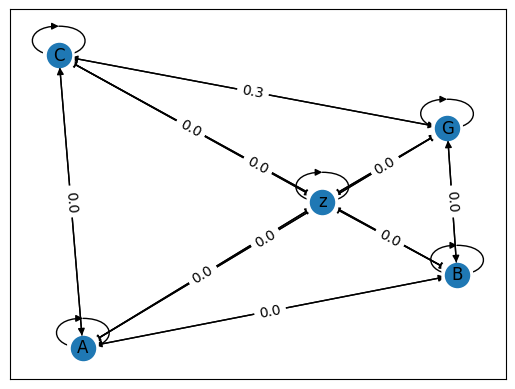

In [ ]:
Pmat_df = pd.DataFrame(columns=estados,index=estados)
for indx, estado in enumerate(estados):
    Pmat_df.loc[estados[indx]] = list(matriz_transicion[indx,:])
#Pmat = Pmat_df.values

edges_wts = _get_markov_edges(Pmat_df)

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(estados)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

## create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'grafo_6estados.dot')